In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Linear Regression

In [87]:
class CustomLinearRegression:
    def __init__(self, X, y, lr=0.01, n_epochs=10000):
        self.n_samples = X.shape[0]            
        self.X = X
        self.y = np.asarray(y).reshape(-1, 1)
        self.lr = lr
        self.n_epochs = n_epochs
        self.theta = np.random.randn(X.shape[1] + 1, 1)
        self.losses = []
    
    def add_bias(self, X):
        return np.c_[np.ones((X.shape[0], 1)), X]
    
    def compute_loss(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)
    
    def predict(self, X):
        X_bias = self.add_bias(X)
        return X_bias.dot(self.theta)
    
    def fit(self):
        X_bias = self.add_bias(self.X)
        
        for epoch in range(self.n_epochs):
            y_pred = X_bias.dot(self.theta)
            loss = self.compute_loss(y_pred, self.y)
            self.losses.append(loss)
            
            # compute gradient & update weight
            gradients = (2 / self.n_samples) * X_bias.T.dot(y_pred - self.y)
            self.theta -= self.lr * gradients
            
            if epoch % 50 == 0:
                print(f"Epoch: {epoch} - loss: {loss:.6f}")
        
        return {
            "Loss": np.mean(self.losses),
            "weight": self.theta
        }

In [4]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2) # Residual Sum of Squares
    tss = np.sum((y - y.mean()) ** 2) # Total Sum of Squares
    r2 = 1 - (rss / tss)
    return r2

In [5]:
y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([1, 2, 3, 4, 5])
result1 = r2score(y_pred, y)

y_pred = np.array([1, 2, 3, 4, 5])
y = np.array([3, 5, 5, 2, 4])
result2 = r2score(y_pred, y)

print("Question 4: ")
print(result1, "and", result2)

Question 4: 
1.0 and -2.235294117647059


## Poly Regression

In [6]:
def create_polynomial_features(X, degree=2):
    for d in range(2, degree + 1):
        X_new = X
        X_new = np.c_[X_new, np.power(X, d)]
        return X_new

X = np.array([[1], [2], [3]])
create_polynomial_features(X)

array([[1, 1],
       [2, 4],
       [3, 9]])

In [7]:
def create_polynomial_features(X, degree=2) :
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2 , degree+1) :
            X_new = np.c_[X_new, np.power(X_sub , d)]
            X_mem.extend(X_new.T)
    return np.c_[X_mem].T

X = np.array([[1, 2], [2, 3], [3, 4]])
create_polynomial_features(X)

array([[ 1,  1,  2,  4],
       [ 2,  4,  3,  9],
       [ 3,  9,  4, 16]])

## Sales Prediction

In [12]:
df = pd.read_csv("data/SalesPrediction.csv")
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [14]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

### Preprocessing

#### One Hot Encoding

In [16]:
df = pd.get_dummies(df)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


#### Fill null values with mean

In [17]:
df = df.fillna(df.mean())
df.isnull().sum()

TV                  0
Radio               0
Social Media        0
Sales               0
Influencer_Macro    0
Influencer_Mega     0
Influencer_Micro    0
Influencer_Nano     0
dtype: int64

#### Correlation

In [18]:
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Influencer_Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


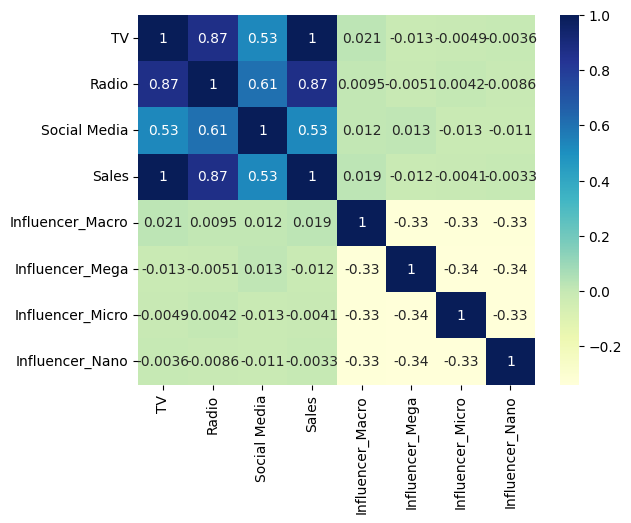

In [20]:
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

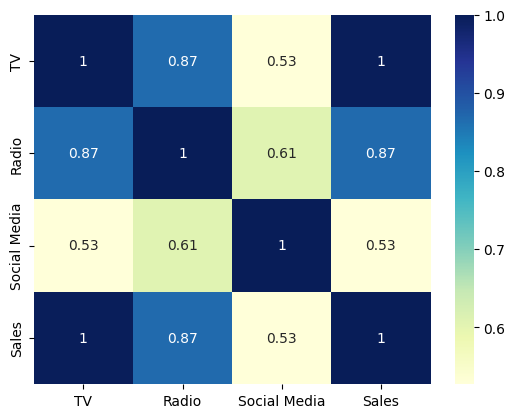

In [22]:
new_df = df[["TV", "Radio", "Social Media", "Sales"]]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

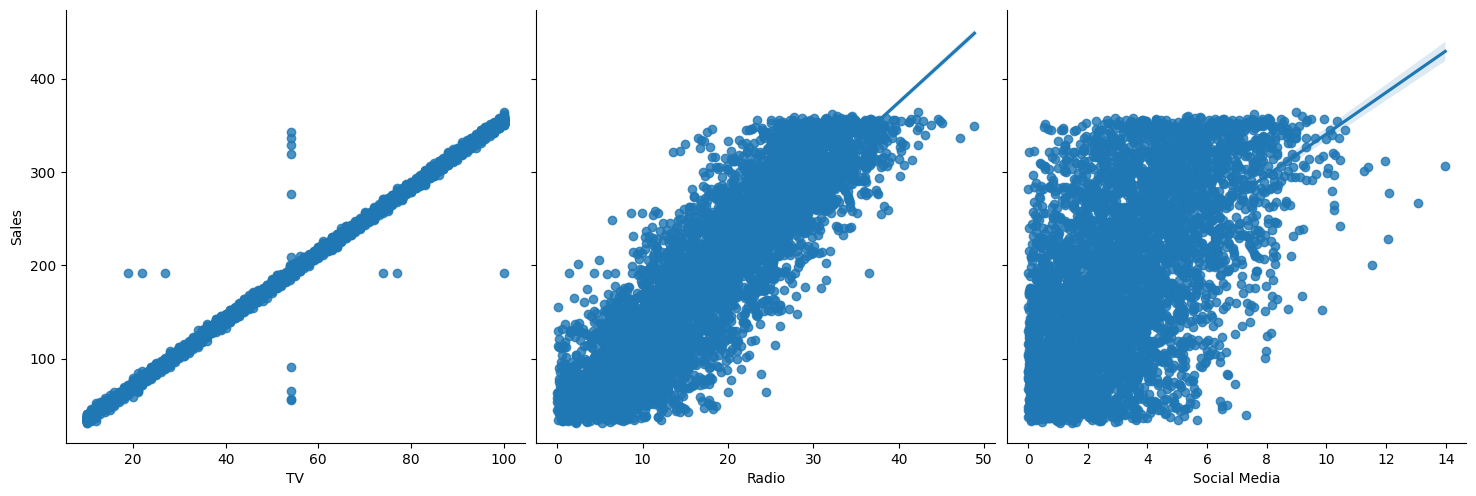

In [23]:
sns.pairplot(
    data = df,
    x_vars = ["TV", "Radio", "Social Media"],
    y_vars = "Sales",
    height = 5,
    kind = "reg"
)
plt.show()

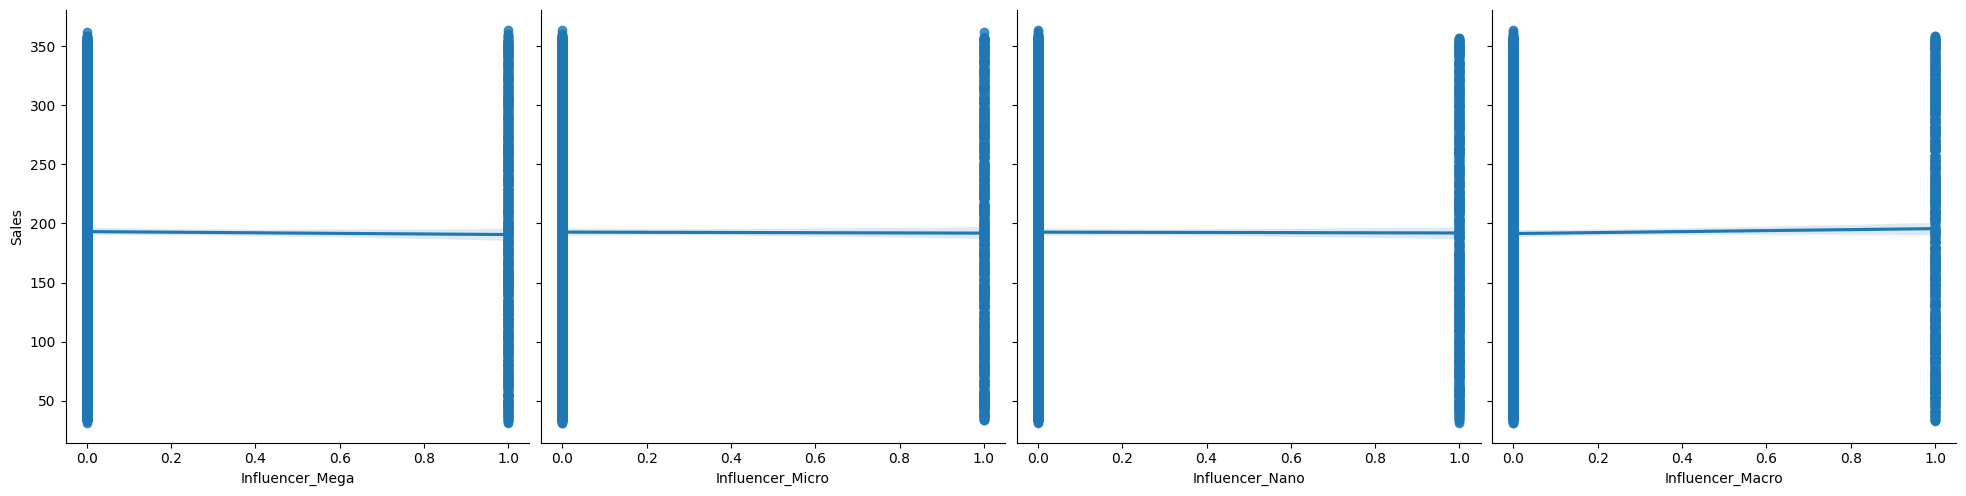

In [25]:
sns.pairplot(
    data = df,
    x_vars = ["Influencer_Mega", "Influencer_Micro", "Influencer_Nano", "Influencer_Macro"],
    y_vars = "Sales",
    height = 5,
    kind = "reg"
)
plt.show()

#### Get features

In [26]:
X = df[["TV", "Radio", "Social Media", "Influencer_Macro", "Influencer_Mega", "Influencer_Micro", "Influencer_Nano"]]
y = df[["Sales"]]

X.shape, y.shape

((4572, 7), (4572, 1))

#### Train test split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3063, 7), (1509, 7), (3063, 1), (1509, 1))

#### Feature scaling

In [35]:
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)
X_test_processed = scaler.transform(X_test)

X_train_processed.shape, X_test_processed.shape

((3063, 7), (1509, 7))

In [36]:
scaler.mean_

array([54.17357772, 18.22801905,  3.33704144,  0.24779628,  0.25138753,
        0.25008162,  0.25073457])

In [37]:
print("Question 10: ")
scaler.mean_[0]

Question 10: 


54.173577723283785

#### Create polynomial features

In [40]:
poly_features = PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train_processed)
X_test_poly = poly_features.transform(X_test_processed)

#### Linear Regression

In [92]:
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [93]:
y_pred = poly_model.predict(X_test_poly)
r2_score(y_test, y_pred)

0.9951466485212442

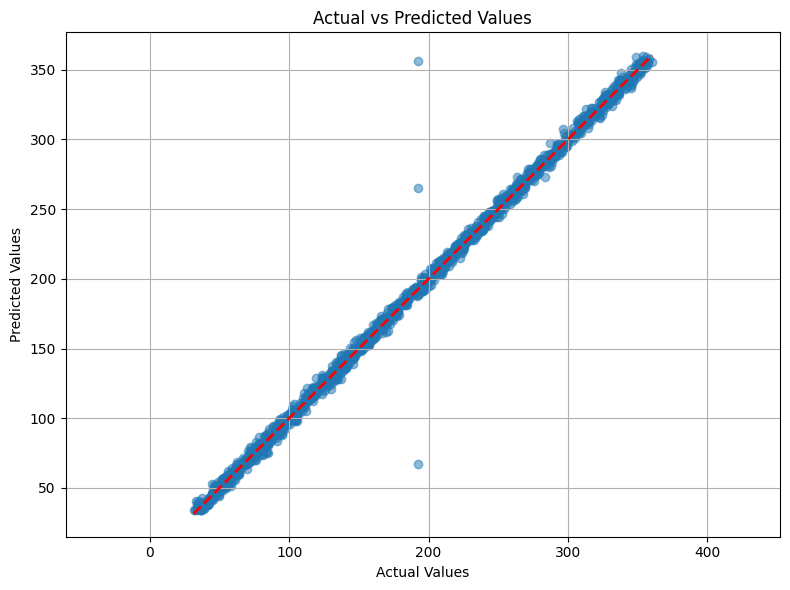

In [170]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Customize the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()

plt.show()

#### Custom Linear Regresion

In [88]:
poly_model = CustomLinearRegression(X_train_poly, y_train)
poly_model.fit()

Epoch: 0 - loss: 46572.141939
Epoch: 50 - loss: 933.317489
Epoch: 100 - loss: 431.896932
Epoch: 150 - loss: 306.366274
Epoch: 200 - loss: 237.743730
Epoch: 250 - loss: 193.639172
Epoch: 300 - loss: 162.865534
Epoch: 350 - loss: 140.295729
Epoch: 400 - loss: 123.270678
Epoch: 450 - loss: 110.234011
Epoch: 500 - loss: 100.173293
Epoch: 550 - loss: 92.377967
Epoch: 600 - loss: 86.325341
Epoch: 650 - loss: 81.620623
Epoch: 700 - loss: 77.961390
Epoch: 750 - loss: 75.114272
Epoch: 800 - loss: 72.898500
Epoch: 850 - loss: 71.173773
Epoch: 900 - loss: 69.831078
Epoch: 950 - loss: 68.785668
Epoch: 1000 - loss: 67.971628
Epoch: 1050 - loss: 67.337683
Epoch: 1100 - loss: 66.843939
Epoch: 1150 - loss: 66.459347
Epoch: 1200 - loss: 66.159746
Epoch: 1250 - loss: 65.926328
Epoch: 1300 - loss: 65.744452
Epoch: 1350 - loss: 65.602719
Epoch: 1400 - loss: 65.492254
Epoch: 1450 - loss: 65.406147
Epoch: 1500 - loss: 65.339016
Epoch: 1550 - loss: 65.286669
Epoch: 1600 - loss: 65.245842
Epoch: 1650 - loss: 

{'Loss': 100.09702449262231,
 'weight': array([[ 2.88219077e+01],
        [ 2.90777935e+01],
        [ 9.11195732e+01],
        [ 1.71926330e+00],
        [ 2.12781442e-01],
        [ 2.54253320e-01],
        [ 5.34148528e-01],
        [-6.52485257e-01],
        [ 1.00529264e+00],
        [ 1.30396160e+00],
        [-2.97889474e+00],
        [-3.05140544e-01],
        [-1.38960732e+00],
        [-9.79241466e-01],
        [-1.05496530e+00],
        [-7.69229335e-01],
        [ 1.78059028e+00],
        [ 7.68321359e-02],
        [ 6.71118089e-01],
        [ 1.09990113e-01],
        [ 9.40758635e-02],
        [-1.93062943e-01],
        [ 1.59740635e-02],
        [-8.47871559e-01],
        [-6.50223929e-01],
        [-5.82060761e-01],
        [-8.23300528e-01],
        [ 2.88883135e+01],
        [-8.15428542e+00],
        [-1.01712111e+01],
        [-8.07060200e+00],
        [ 2.93599778e+01],
        [-1.01805210e+01],
        [-8.65088595e+00],
        [ 2.89220643e+01],
        [-8.9802

In [89]:
y_pred = poly_model.predict(X_test_poly)
r2_score(y_test, y_pred)

0.9951773790469908

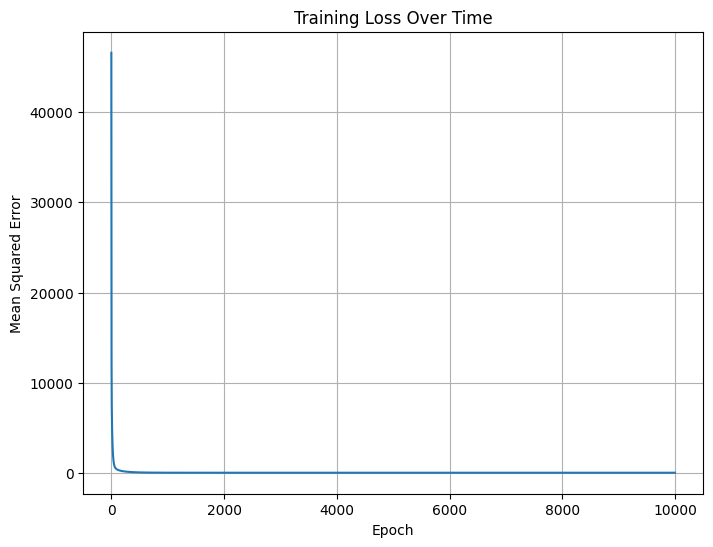

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(poly_model.losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

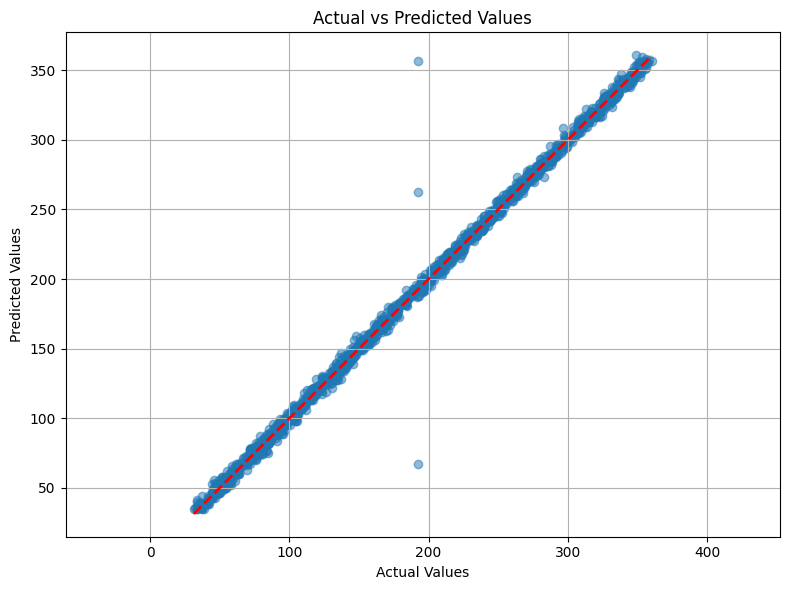

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)

# Add a perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

# Customize the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()

plt.show()